In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
from scipy.optimize import minimize

import clarsach
import xpysis

%matplotlib inline

In [2]:
UNIT = 'angs'

In [3]:
DATA_DIR = os.environ['HOME'] + "/dev/clarsach/data"
mrk_dir  = DATA_DIR + "/tgcat/obs_15477_tgid_4679/"
mrk_heg1_file = mrk_dir + "heg_1.pha"

In [4]:
mrk421 = xpysis.Spectrum(mrk_heg1_file, telescope='HETG')

In [5]:
mrk421_bkg = xpysis.BkgSpectrum(mrk_heg1_file)

**Test plotting before assigning background**

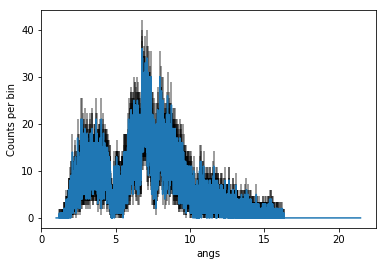

In [6]:
ax = plt.subplot(111)
xpysis.plot_counts(ax, mrk421, xunit=UNIT)

**Test plotting after assigning background**

In [7]:
mrk421.assign_bkg(mrk421_bkg)

[]

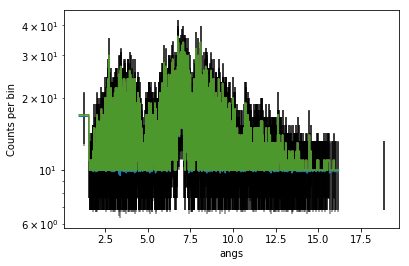

In [17]:
ax = plt.subplot(111)
xpysis.plot_counts(ax, mrk421, xunit=UNIT)
xpysis.plot_counts(ax, mrk421, bkgsub=False, alpha=0.8, xunit=UNIT)
xpysis.plot_counts(ax, mrk421, bkgsub=False, usebackscal=False, alpha=0.8, xunit=UNIT)

plt.semilogy()

In [9]:
lo, hi, cts0, cts_err0 = mrk421.bin_counts(bkgsub=False)
lo, hi, cts1, cts_err1 = mrk421.bin_counts(bkgsub=True)
lo, hi, cts2, cts_err2 = mrk421.bin_counts(bkgsub=True, usebackscal=False)

print(any(cts0 != cts1))
print(any(cts1 != cts2))

True
True


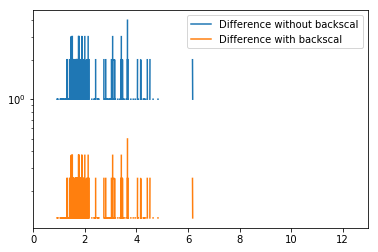

In [10]:
mid = 0.5 * (lo + hi)
plt.plot(mid, cts0-cts2, label='Difference without backscal')
plt.plot(mid, cts0-cts1, label='Difference with backscal')
plt.semilogy()
plt.legend(loc='upper right')

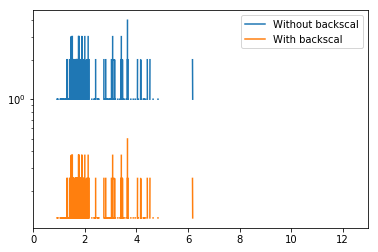

In [11]:
plt.plot(mrk421.bkg.bin_mid, mrk421.bkg.counts, label='Without backscal')
plt.plot(mrk421.bkg.bin_mid, mrk421.bkg.counts * mrk421.bkg.backscal, label='With backscal')
plt.semilogy()
plt.legend(loc='upper right')

## Test background with binning

In [12]:
xpysis.group_mincounts(mrk421, 10)

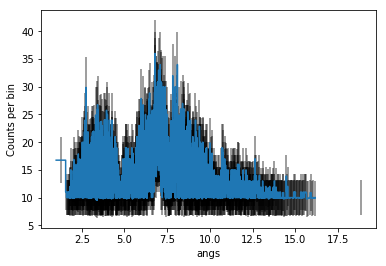

In [13]:
ax = plt.subplot(111)
xpysis.plot_counts(ax, mrk421, bkgsub=True, xunit=UNIT)

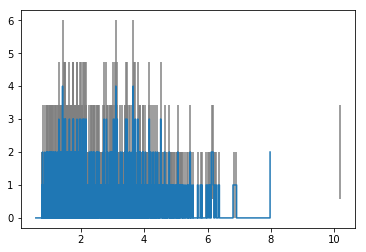

In [14]:
lo, hi, bkg_cts, bkg_cts_err = mrk421.bin_bkg(usebackscal=False)
plt.errorbar(0.5*(lo+hi), bkg_cts, yerr=bkg_cts_err, ls='', color='0.5')
plt.step(lo, bkg_cts, where='post')

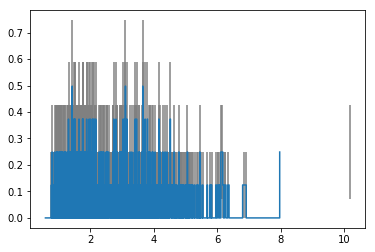

In [15]:
lo, hi, bkg_cts, bkg_cts_err = mrk421.bin_bkg(usebackscal=True)
plt.errorbar(0.5*(lo+hi), bkg_cts, yerr=bkg_cts_err, ls='', color='0.5')
plt.step(lo, bkg_cts, where='post')

** Test flux plotting **

[]

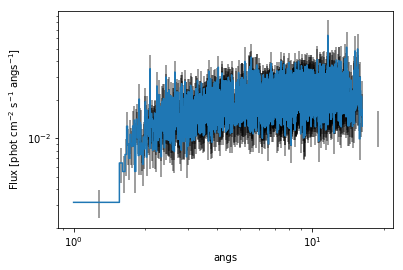

In [16]:
ax = plt.subplot(111)
xpysis.plot_unfold(ax, mrk421, xunit=UNIT)
plt.loglog()